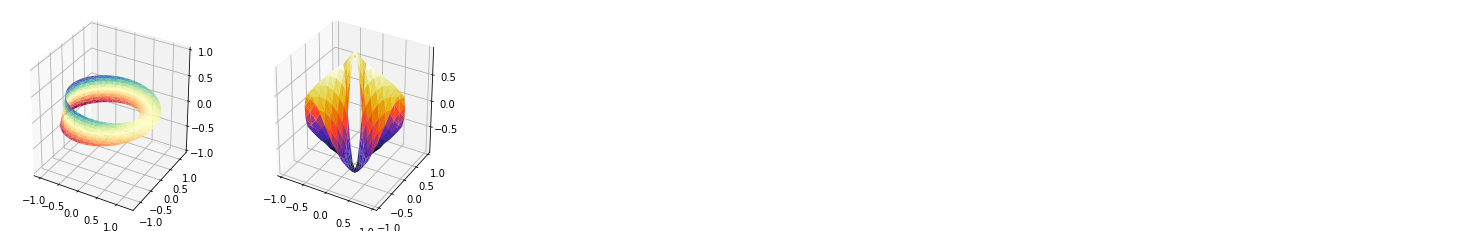

In [1]:
'''
===========================
More triangular 3D surfaces
===========================

Two additional examples of plotting surfaces with triangular mesh.

The first demonstrates use of plot_trisurf's triangles argument, and the
second sets a Triangulation object's mask and passes the object directly
to plot_trisurf.
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure(figsize=plt.figaspect(0.5))

#============
# First plot
#============

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)


#============
# Second plot
#============

# Make parameter spaces radii and angles.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(3*angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid**2 + ymid**2 < min_radius**2, 1, 0)
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)


plt.show()


In [4]:
z

array([  9.68912422e-01,   9.07364364e-01,   9.00447102e-01,
         8.23475453e-01,   7.96083799e-01,   7.06757175e-01,
         6.59983146e-01,   5.61862719e-01,   8.39102771e-01,
         6.64236815e-01,   7.79810065e-01,   6.02825871e-01,
         6.89428793e-01,   5.17382161e-01,   5.71562170e-01,
         4.11312057e-01,   4.84456211e-01,   2.43127549e-01,
         4.50223551e-01,   2.20649583e-01,   3.98041899e-01,
         1.89375014e-01,   3.29991573e-01,   1.50550662e-01,
         5.93287748e-17,  -2.43127549e-01,   5.51364831e-17,
        -2.20649583e-01,   4.87460738e-17,  -1.89375014e-01,
         4.04123124e-17,  -1.50550662e-01,  -4.84456211e-01,
        -6.64236815e-01,  -4.50223551e-01,  -6.02825871e-01,
        -3.98041899e-01,  -5.17382161e-01,  -3.29991573e-01,
        -4.11312057e-01,  -8.39102771e-01,  -9.07364364e-01,
        -7.79810065e-01,  -8.23475453e-01,  -6.89428793e-01,
        -7.06757175e-01,  -5.71562170e-01,  -5.61862719e-01,
        -9.68912422e-01,

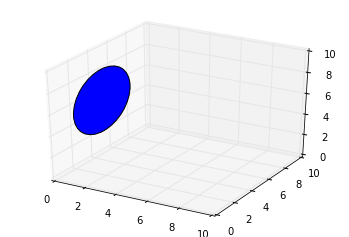

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import mpl_toolkits.mplot3d.art3d as art3d


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw a circle on the x=0 'wall'
p = Circle((5, 5), 3)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

plt.show()

<Figure size 432x288 with 0 Axes>

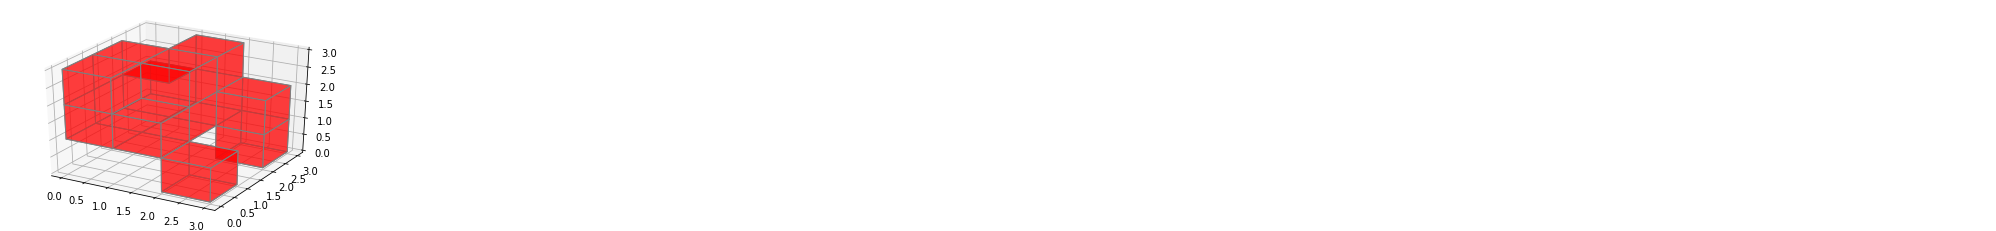

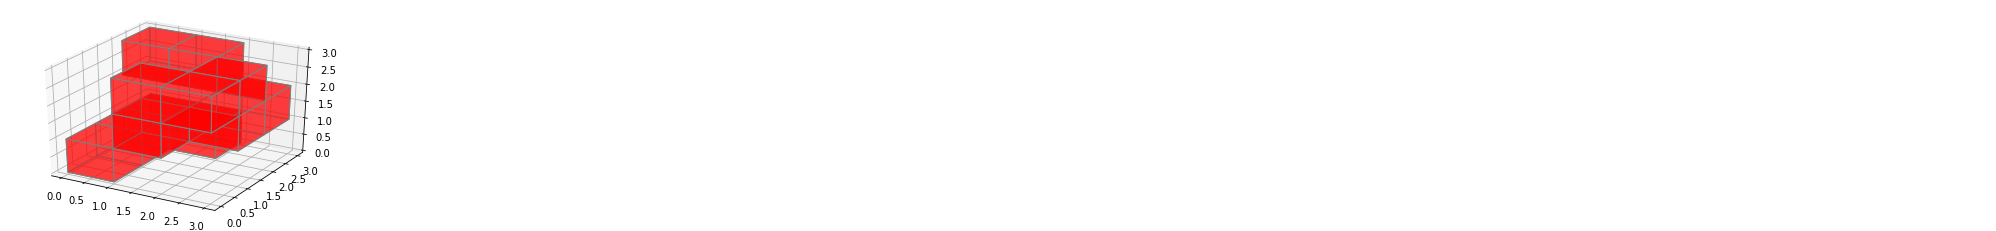

TypeError: Invalid dimensions for image data

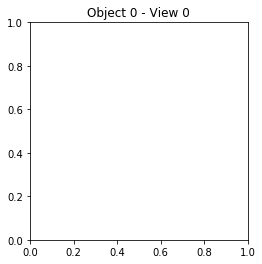

In [7]:
"""
Visualize 3d voxels and 2d images.
Author: @JustinShenk
Note: Requires matplotlib 2.0.2 or later to use the `ax.voxels` method (https://matplotlib.org/devdocs/gallery/mplot3d/voxels.html).
"""
import sys
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()


def plot_voxels(data, ind):
    """Plot voxels of `data`.
        Args:
            data - n-dimensional np.array
            ind - index of image for label
    """

    # Reshape and convert to bool
    data = data.reshape((3, 3, 3)).astype(bool)
    x, y, z = np.indices(data.shape).astype(float)

    # Add color
    c = np.ones(data.shape, object)
    c.fill('#7A88CC')
    c[where(data)] = '#FFD65D'

    fig = plt.figure()
    fig.patch.set_alpha(0.5)
    ax = fig.gca(projection='3d')
    ax.patch.set_alpha(0.5)  # Set semi-opacity
    colors = np.zeros((3, 3, 3, 4))
    colors[data] = [1, 0, 0, 0.5]
    ax.voxels(data, facecolors=colors, edgecolor='gray')
    plt.savefig('label{}'.format(ind))  # Optional
    plt.show()


# Load two 3d data samples
labels_data = array([[0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
                      1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
                      0.],
                     [1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
                      0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
                      0.]])

# Plot y labels
for ind, data in enumerate(labels_data):
    plot_voxels(data, ind)

# # Plot x inputs (2d views):
# data = np.load('first10.npy')

# for img_index, image in enumerate(data[:2]):
#     for view_index, view in enumerate(image):
#         if view_index < 2:  # For demo only
#             fig = plt.figure()
#             plt.title('Object {} - View {}'.format(img_index, view_index))
#             plt.imshow(view)
#             plt.savefig('Object{}-View{}'.format(img_index, view_index))

plt.show()

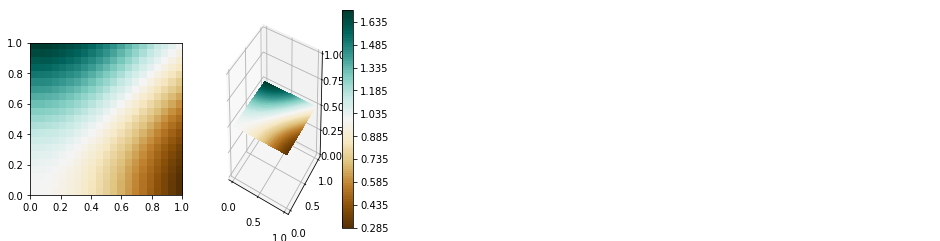

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# create a 21 x 21 vertex mesh
xx, yy = np.meshgrid(np.linspace(0,1,21), np.linspace(0,1,21))

# create vertices for a rotated mesh (3D rotation matrix)
X =  xx 
Y =  yy
Z =  10*np.ones(X.shape)

# create some dummy data (20 x 20) for the image
data = np.cos(xx) * np.cos(xx) + np.sin(yy) * np.sin(yy)

# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(data, cmap=plt.cm.BrBG, interpolation='nearest', origin='lower', extent=[0,1,0,1])

# show the 3D rotated projection
ax2 = fig.add_subplot(122, projection='3d')
cset = ax2.contourf(X, Y, data, 100, zdir='z', offset=0.5, cmap=cm.BrBG)

ax2.set_zlim((0.,1.))

plt.colorbar(cset)
plt.show()

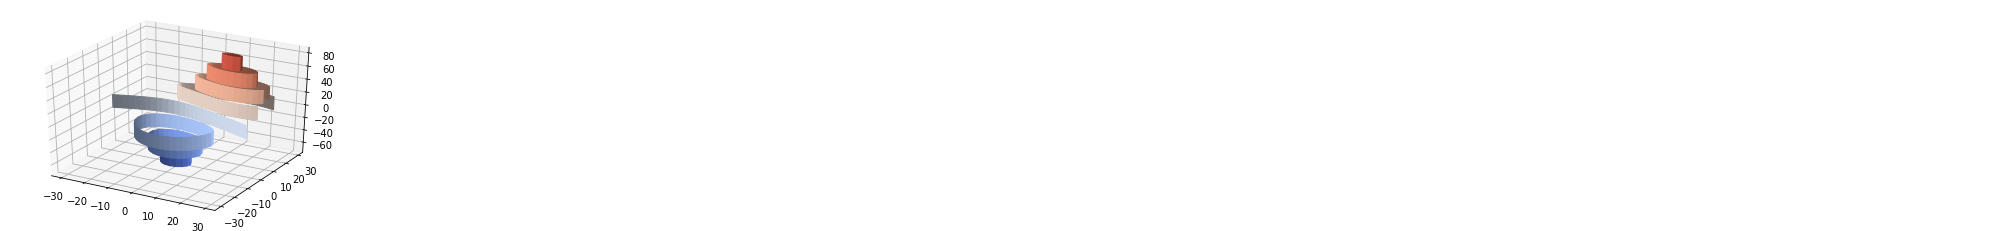

In [9]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z, extend3d=True, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()


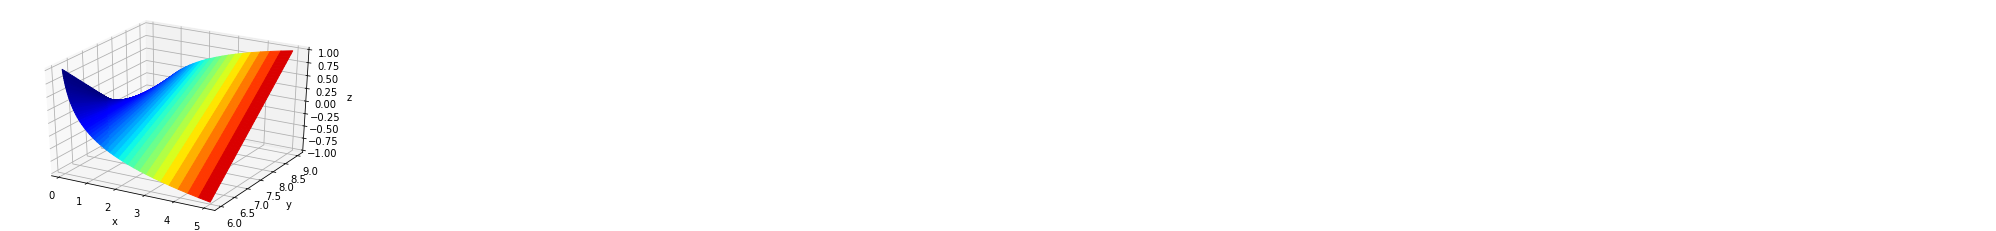

In [15]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# domains
x = np.logspace(-1.,np.log10(5),50) # [0.1, 5]
y = np.linspace(6,9,50)             # [6, 9]
z = np.linspace(-1,1,50)            # [-1, 1]

# convert to 2d matrices
Z = np.outer(z.T, z)        # 50x50
X, Y = np.meshgrid(x, y)    # 50x50

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = X # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

[[(0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)]]


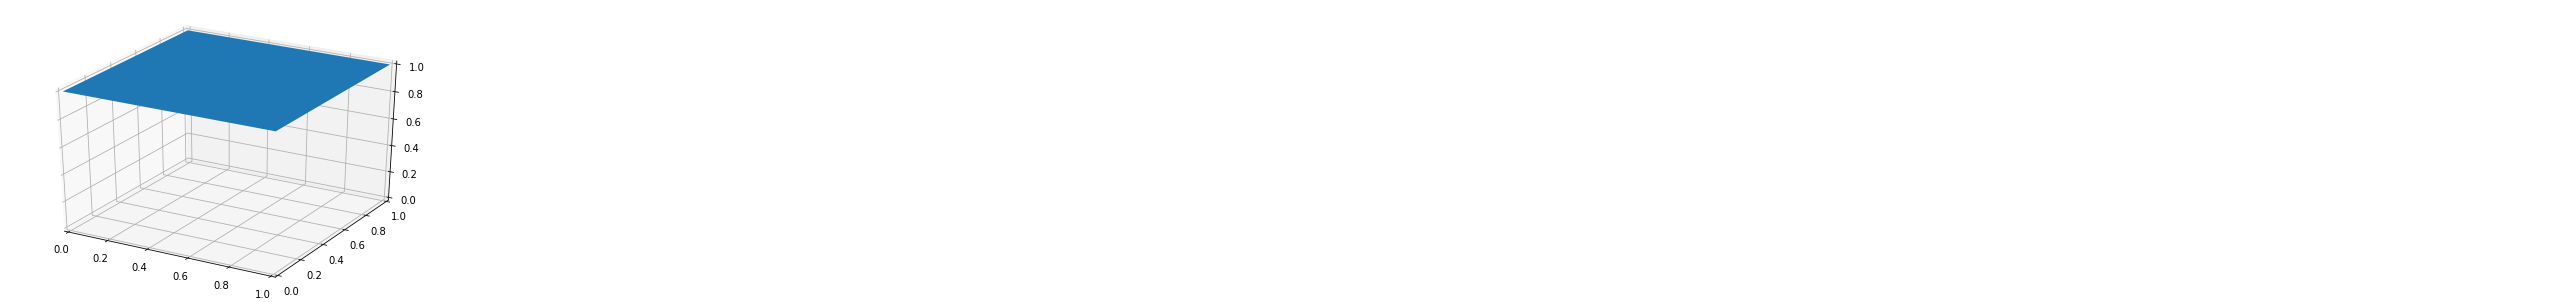

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
x = [0, 0, 1, 1]
y = [0, 1, 1, 0]
z = [1, 1, 1, 1]
verts = [list(zip(x, y, z))]
print(verts)
ax.add_collection3d(Poly3DCollection(verts), zs='z')
plt.show()

In [1]:
%matplotlib notebook
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

s = np.linspace(0, 2 * np.pi, 240)
t = np.linspace(0, np.pi, 240)
tGrid, sGrid = np.meshgrid(s, t)

r = 2 + np.sin(7 * sGrid + 5 * tGrid)  # r = 2 + sin(7s+5t)
x = r * np.cos(sGrid) * np.sin(tGrid)  # x = r*cos(s)*sin(t)
y = r * np.sin(sGrid) * np.sin(tGrid)  # y = r*sin(s)*sin(t)
z = r * np.cos(tGrid)                  # z = r*cos(t)

surface = go.Surface(x=x, y=y, z=z)
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='jupyter-parametric_plot')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.